[[564. 512.]
 [583. 508.]
 [594. 514.]
 [628. 499.]
 [641. 513.]
 [618. 503.]
 [663. 510.]]
lArrayNeg:  [1.0510772  1.05352551 1.05503003 1.07169501 1.05029395 1.04586942
 1.03472133 1.02136834 1.01148247        nan        nan        nan
        nan 0.98378104 0.97328471 0.99734691 1.00253653 1.00418992
 1.01308901 1.01316554 1.01198917 1.01470946 1.01050504 1.01209158
 1.00312197 0.98956723 0.98051696        nan        nan        nan
        nan        nan        nan        nan        nan]
rArrayNeg:  [0.04874317 0.0553752  0.06198005 0.06794508 0.07308055 0.07763512
 0.08319871 0.08842474 0.09226531        nan        nan        nan
        nan 0.11704267 0.12178297 0.12940494 0.13623438 0.14262007
 0.148557   0.15477448 0.16078791 0.16589852 0.17138391 0.17630038
 0.18085406 0.18443692 0.18723852        nan        nan        nan
        nan        nan        nan        nan        nan]
dArrayNeg:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan na

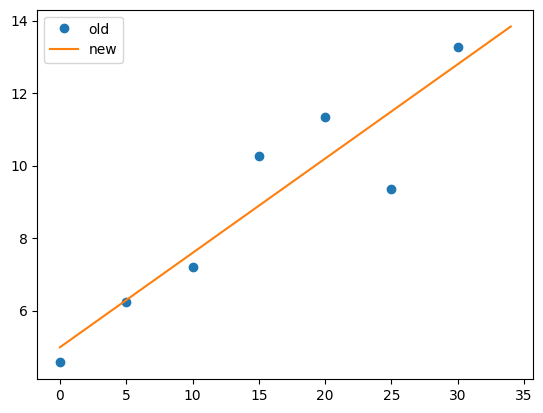

<Figure size 640x480 with 0 Axes>

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import fsolve


epsilonArray = np.load('output/outputEpsilon.npy')
xiPrimeNegArray = np.load('output/outputXiNeg.npy')
xiPrimePosArray = np.load('output/outputXiPos.npy')
centerArray = np.load('output/outputCenter.npy',allow_pickle=True)
print(centerArray)
radiusArray = np.load('output/outputRadius.npy')

rArrayPos = np.zeros(len(centerArray))
rArrayNeg = np.zeros(len(centerArray))

lArrayPos = np.zeros(len(centerArray))
lArrayNeg = np.zeros(len(centerArray))

epsilonPrimeArray = np.zeros(len(centerArray))

for i in range(len(centerArray)):

    xValue, yValue = centerArray[i][0], centerArray[i][1]
    xValue = xValue - 512
    yValue = yValue - 512

    xValue = xValue*45/512
    yValue = yValue*45/512

    epsilonPrimeArray[i] = np.sqrt(xValue**2 + yValue**2)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), epsilonPrimeArray)
epsilonPrimeArrayNew = linearFunc(np.arange(15,50), *parameters)

plt.figure()
plt.plot(np.arange(0,35,5),epsilonPrimeArray, 'o', label='old')
plt.plot(np.arange(0,35),epsilonPrimeArrayNew, '-', label='new')
plt.legend()
plt.figure()

    
rArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
rArrayPos = np.zeros(len(epsilonPrimeArrayNew))
lArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
lArrayPos = np.zeros(len(epsilonPrimeArrayNew))
dArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
dArrayPos = np.zeros(len(epsilonPrimeArrayNew))

# for positive xi
for i in range(len(epsilonPrimeArrayNew)):

    xi = xiPrimePosArray[i]
    epsilon = epsilonArray[i]
    epsilonPrime = epsilonPrimeArrayNew[i]

    chi = 180 - epsilon - (90 - xi)
    s = np.sin(np.pi/2-np.deg2rad(xi))/np.sin(np.deg2rad(chi))
    r = s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    l = np.sqrt(r**2 + s**2)
    d = np.sqrt(l**2 + 1**2 - 2*l*1*np.cos(np.deg2rad(epsilonPrime)))

    rArrayPos[i] = r
    lArrayPos[i] = l
    dArrayPos[i] = d

    # theta = 90 - xiPrimePosArray[i]
    # epsilon = epsilonArray[i]
    # chi = 180 - epsilon - theta
    # s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    # epsilonPrime = epsilonPrimeArrayNew[i]

    # r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    # rArrayPos[i] = r

    # l = np.sqrt(r**2 + s**2)
    # lArrayPos[i] = l

for i in range(len(epsilonPrimeArrayNew)):

    xi = xiPrimeNegArray[i]
    epsilon = epsilonArray[i]
    epsilonPrime = epsilonPrimeArrayNew[i]

    chi = 180 - epsilon - (90 - xi)
    s = np.sin(np.pi/2-np.deg2rad(xi))/np.sin(np.deg2rad(chi))
    r = s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    l = np.sqrt(r**2 + s**2)

    rArrayNeg[i] = r
    lArrayNeg[i] = l
    dArrayNeg[i] = d

    # theta = 90 - xiPrimeNegArray[i]
    # epsilon = epsilonArray[i]
    # chi = 180 - epsilon - theta
    # s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    # epsilonPrime = epsilonPrimeArrayNew[i]
    
    # r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    # rArrayNeg[i] = r

    # l = np.sqrt(r**2 + s**2)
    # lArrayNeg[i] = l



print("lArrayNeg: ",lArrayNeg)
print("rArrayNeg: ",rArrayNeg)
print("dArrayNeg: ",dArrayNeg)
print("xiPrimeNegarray", xiPrimeNegArray)

print("lArrayPos: ",lArrayPos)
print("rArrayPos: ",rArrayPos)
print("dArrayPos: ",dArrayPos)
print("xiPrimePosarray", xiPrimePosArray)

print("epsilonArray: ", epsilonArray)


In [2]:
def trueXi(l, r, d, xiPrime):
    
    theta = np.arccos(r/l) + np.arccos((d**2 + l**2 - 1**2)/(2*l*d)) - np.pi

    return np.rad2deg(r*theta/(r+d)) + xiPrime

    # d = np.sqrt(l**2 + 1 - 2*l*np.cos(np.deg2rad(epsilon)))

    # chiPrime = np.rad2deg(np.arccos((l**2 + d**2 - 1)/(2*l*d)))

    
    # func = lambda xi :  -xiPrime + xi + r/(r+d)*(180 - chiPrime- np.rad2deg(np.arccos(r/l)))
    # sol = fsolve(func, xiPrime)

    # print("d: ", d)
    # print("l: ", l)
    # print("r: ", r)
    # print("epsilon: ", epsilon)
    # print("xiPrime: "   , xiPrime)
    # print("func(sol) = " , func(sol))
    # print("xi: ", sol)
    # if(xiPrime == sol):
    #     return np.nan
    # return sol



xiNegarray = np.zeros(35)
xiPosarray = np.zeros(35)

print("xiPrimeNegArray: ", xiPrimeNegArray)
print("xiPrimePosArray: ", xiPrimePosArray)

for i in range(35):
    if np.isnan(xiPrimeNegArray[i]) or np.isnan(xiPrimePosArray[i]):
        xiNegarray[i] = np.nan
        xiPosarray[i] = np.nan
        continue
    xiNegarray[i] = trueXi(lArrayNeg[i], rArrayNeg[i], dArrayNeg[i], xiPrimeNegArray[i])
    xiPosarray[i] = trueXi(lArrayPos[i], rArrayPos[i], dArrayPos[i], xiPrimePosArray[i])

print("xiNegarray: ", xiNegarray)
print("xiPosarray: ", xiPosarray)

xiPrimeNegArray:  [-16.20672851 -15.22589497 -14.02245947 -17.51735846  -9.88513203
  -7.56717301  -3.39929066   1.07232979   4.22911107          nan
          nan          nan          nan  12.62890043  15.08180895
  10.39576266   9.78499057   9.90213023   8.66887592   9.13921534
   9.81371014   9.75936643  10.89665848  11.02674904  12.82115317
  15.21691815  16.8082641           nan          nan          nan
          nan          nan          nan          nan          nan]
xiPrimePosArray:  [31.50070747 31.75026745 31.7772359  36.3267736  29.92496548 28.66165542
 25.72420145 22.48235771 20.38026393         nan         nan         nan
         nan 17.78125582 16.55930433 22.30002237 24.14124607 25.25455922
 27.54248824 28.30260354 28.85856436 29.96875162 30.0618816  30.98644066
 30.42246342 29.25712765 28.72043701         nan         nan         nan
         nan         nan         nan         nan         nan]
xiNegarray:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

In [3]:
maxImages = 20

posCoef = np.polyfit(np.arange(0,maxImages),xiPosarray[:maxImages],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])

posMean = np.mean(xiPosarray[:maxImages])
print("pos mean: ", posMean)
print("pos sigma:", np.std(xiPosarray[:maxImages]))

negCoef = np.polyfit(np.arange(0,maxImages),xiNegarray[:maxImages],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])

negMean = np.mean(xiNegarray[:maxImages])
print("neg mean: ", np.mean(negMean))
print("neg sigma:", np.std(xiNegarray[:maxImages]))

pos m:  nan
pos b:  nan
pos mean:  nan
pos sigma: nan
neg m:  nan
neg b:  nan
neg mean:  nan
neg sigma: nan


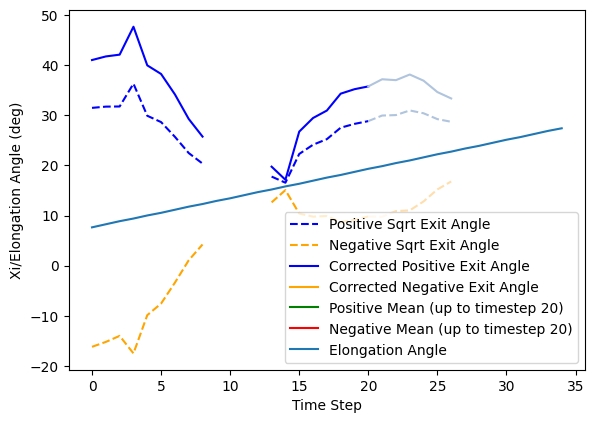

In [4]:
fig, axs = plt.subplots(figsize=(10/1.5,7/1.5))   
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimePosArray[:maxImages+1], label='Positive Sqrt Exit Angle', color='blue', linestyle='dashed')
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimeNegArray[:maxImages+1], label='Negative Sqrt Exit Angle', linestyle='dashed', color='orange') 
axs.plot(np.arange(0,35)[:maxImages+1],xiPosarray[:maxImages+1], label='Corrected Positive Exit Angle', linestyle='solid', color='blue')
axs.plot(np.arange(0,35)[:maxImages+1],xiNegarray[:maxImages+1], label='Corrected Negative Exit Angle', linestyle='solid', color='orange')

axs.plot(np.arange(0,35)[maxImages:],xiPrimePosArray[maxImages:], color='lightsteelblue', linestyle='dashed')
axs.plot(np.arange(0,35)[maxImages:],xiPrimeNegArray[maxImages:], linestyle='dashed', color='navajowhite') 
axs.plot(np.arange(0,35)[maxImages:],xiPosarray[maxImages:], linestyle='solid', color='lightsteelblue')
axs.plot(np.arange(0,35)[maxImages:],xiNegarray[maxImages:], linestyle='solid', color='navajowhite')

axs.plot(np.arange(0,35), np.full(35, posMean), label='Positive Mean (up to timestep 20)', color='green')
axs.plot(np.arange(0,35), np.full(35, negMean), label='Negative Mean (up to timestep 20)', color='red')
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='best') 
plt.show()

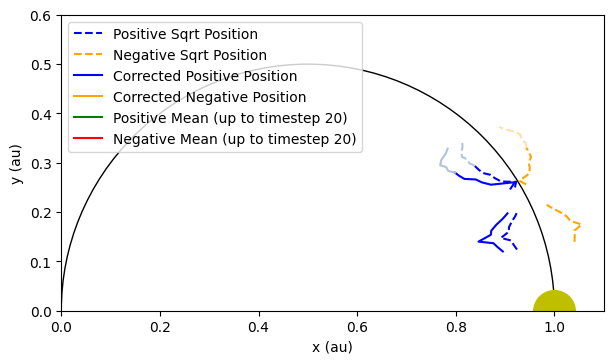

In [5]:
def calculatePositions(array, epsilonArray):
    positionArray = np.zeros((len(array),2))
    for i in range(len(array)):
        xi = array[i]
        epsilon = epsilonArray[i]
        cotXi = 1/np.tan(np.radians(xi))
        # print("cotXi = ", cotXi)
        tanE = np.tan(np.radians(epsilon))
        # print("tanE = ", tanE)
        x = cotXi/(tanE + cotXi)
        y = tanE*x
        positionArray[i] = np.array([x,y])
    
    return positionArray


fig, axs = plt.subplots(1,1, figsize=(7,7))
axs.plot(1,0, 'yo', markersize=30)

posPositionArray = calculatePositions(xiPrimePosArray, epsilonArray)
negPositionArray = calculatePositions(xiPrimeNegArray, epsilonArray)
posPositionArrayAdj = calculatePositions(xiPosarray, epsilonArray)
negPositionArrayAdj = calculatePositions(xiNegarray, epsilonArray)


axs.plot(posPositionArray[:maxImages+1,0],posPositionArray[:maxImages+1,1],color='blue', label='Positive Sqrt Position', linestyle='dashed')
axs.plot(negPositionArray[:maxImages+1,0],negPositionArray[:maxImages+1,1],color='orange', label='Negative Sqrt Position', linestyle='dashed')
axs.plot(posPositionArrayAdj[:maxImages+1,0],posPositionArrayAdj[:maxImages+1,1],color='blue', label='Corrected Positive Position', linestyle='solid')
axs.plot(negPositionArrayAdj[:maxImages+1,0],negPositionArrayAdj[:maxImages+1,1],color='orange', label='Corrected Negative Position', linestyle='solid')

axs.plot(posPositionArray[maxImages:,0],posPositionArray[maxImages:,1],color='lightsteelblue', linestyle='dashed')
axs.plot(negPositionArray[maxImages:,0],negPositionArray[maxImages:,1],color='navajowhite', linestyle='dashed')
axs.plot(posPositionArrayAdj[maxImages:,0],posPositionArrayAdj[maxImages:,1],color='lightsteelblue', linestyle='solid')
axs.plot(negPositionArrayAdj[maxImages:,0],negPositionArrayAdj[maxImages:,1],color='navajowhite', linestyle='solid')


axs.plot([1,1+np.cos(np.deg2rad(posMean+90))],[0,np.sin(np.deg2rad(posMean+90))], color = 'green', label='Positive Mean (up to timestep 20)')
axs.plot([1,1 +np.cos(np.deg2rad(negMean+90))],[0,np.sin(np.deg2rad(negMean+90))], color = 'red', label='Negative Mean (up to timestep 20)')

thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
axs.add_patch(thomson)
axs.set_aspect('equal')
axs.set_ylim(0,0.6)
axs.set_xlim(0,1.1)


axs.set_xlabel('x (au)')
axs.set_ylabel('y (au)')

axs.legend(loc='upper left')

plt.show()
